In [3]:
import os
from PIL import Image
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [4]:
# Base directory for dataset
base_dir = 'C:\\Users\\kandu\\Downloads\\zalando'
train_dir = os.path.join(base_dir, 'train')

# Directories for image and cloth folders within train
image_dir = os.path.join(train_dir, 'image')
cloth_dir = os.path.join(train_dir, 'cloth')

In [5]:
# Function to get image dimensions and aspect ratios
def get_image_properties(directory):
    dimensions = []
    aspect_ratios = []
    for filename in os.listdir(directory):
        img_path = os.path.join(directory, filename)
        with Image.open(img_path) as img:
            width, height = img.size
            dimensions.append((width, height))
            aspect_ratios.append(width / height)
    return dimensions, aspect_ratios

# Get properties for person and cloth images
person_dimensions, person_aspect_ratios = get_image_properties(image_dir)
cloth_dimensions, cloth_aspect_ratios = get_image_properties(cloth_dir)

In [7]:
person_df = pd.DataFrame(person_dimensions, columns=['Width', 'Height'])
person_df['Aspect Ratio'] = person_aspect_ratios

cloth_df = pd.DataFrame(cloth_dimensions, columns=['Width', 'Height'])
cloth_df['Aspect Ratio'] = cloth_aspect_ratios

# Summarize data in text
def summarize_image_properties(df, image_type):
    width_mean = df['Width'].mean()
    height_mean = df['Height'].mean()
    aspect_ratio_mean = df['Aspect Ratio'].mean()
    width_std = df['Width'].std()
    height_std = df['Height'].std()
    aspect_ratio_std = df['Aspect Ratio'].std()

    print(f"--- {image_type} ---")
    print(f"Mean Width: {width_mean:.2f} (±{width_std:.2f})")
    print(f"Mean Height: {height_mean:.2f} (±{height_std:.2f})")
    print(f"Mean Aspect Ratio: {aspect_ratio_mean:.2f} (±{aspect_ratio_std:.2f})")
    print(f"Image Count: {len(df)}")
    print("\n")

# Display summaries for person and cloth images
summarize_image_properties(person_df, "Person Images")
summarize_image_properties(cloth_df, "Cloth Images")

--- Person Images ---
Mean Width: 768.00 (±0.00)
Mean Height: 1024.00 (±0.00)
Mean Aspect Ratio: 0.75 (±0.00)
Image Count: 11647


--- Cloth Images ---
Mean Width: 768.00 (±0.00)
Mean Height: 1024.00 (±0.00)
Mean Aspect Ratio: 0.75 (±0.00)
Image Count: 11647




Mask Coverage Statistics:
Mean Coverage: 44.49%
Median Coverage: 45.07%
Standard Deviation: 8.25%


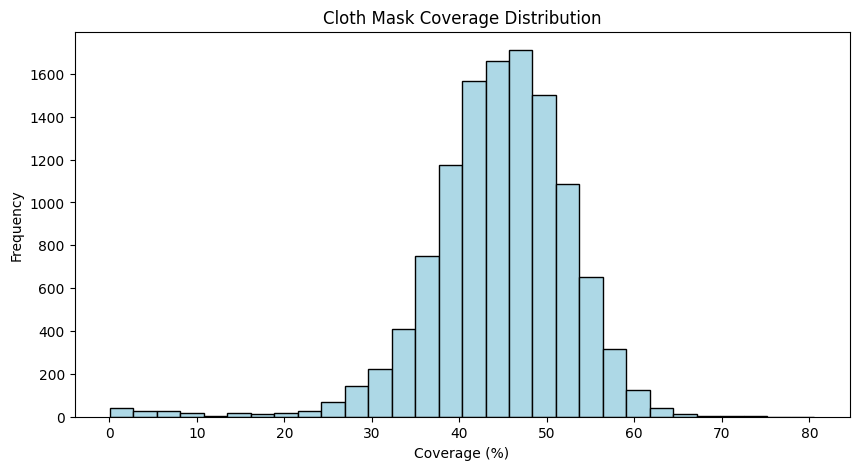

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

# Directory for cloth masks
cloth_mask_dir = os.path.join(train_dir, 'cloth-mask')

# Function to calculate mask coverage
def calculate_mask_coverage(directory):
    coverages = []
    dimensions = []
    for filename in os.listdir(directory):
        mask_path = os.path.join(directory, filename)
        with Image.open(mask_path) as mask:
            mask_np = np.array(mask)
            non_zero_pixels = np.count_nonzero(mask_np)
            total_pixels = mask_np.size
            coverage = (non_zero_pixels / total_pixels) * 100  # percentage of non-zero pixels
            coverages.append(coverage)
            dimensions.append(mask_np.shape)
    return coverages, dimensions

# Calculate mask coverage and dimensions
mask_coverages, mask_dimensions = calculate_mask_coverage(cloth_mask_dir)

# Convert dimensions to DataFrame for easier analysis
mask_df = pd.DataFrame(mask_dimensions, columns=['Height', 'Width'])
mask_df['Coverage (%)'] = mask_coverages

# Display summary statistics for mask coverage
print("Mask Coverage Statistics:")
print(f"Mean Coverage: {np.mean(mask_coverages):.2f}%")
print(f"Median Coverage: {np.median(mask_coverages):.2f}%")
print(f"Standard Deviation: {np.std(mask_coverages):.2f}%")

# Plot Mask Coverage Distribution
plt.figure(figsize=(10, 5))
plt.hist(mask_coverages, bins=30, color='lightblue', edgecolor='black')
plt.title("Cloth Mask Coverage Distribution")
plt.xlabel("Coverage (%)")
plt.ylabel("Frequency")
plt.show()


Displaying sample images from 'image' folder:


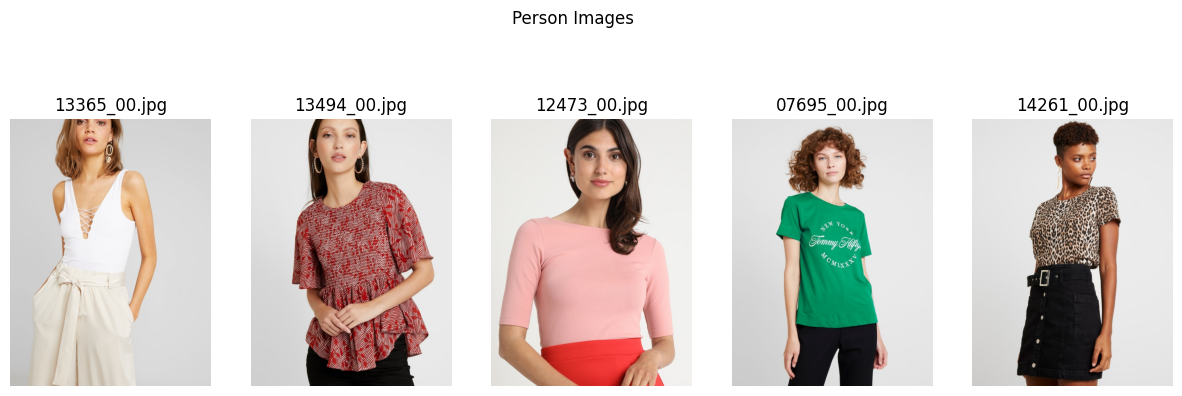

Displaying sample images from 'cloth' folder:


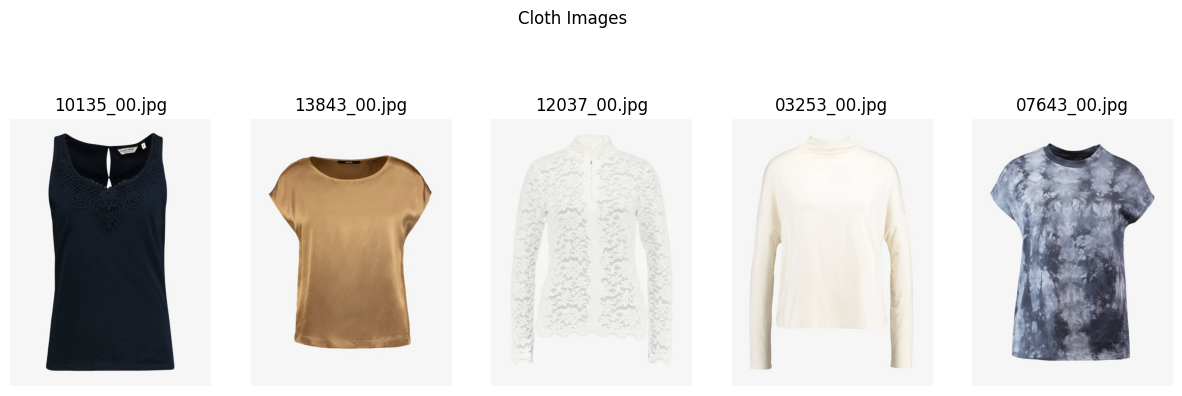

Displaying sample images from 'cloth-mask' folder:


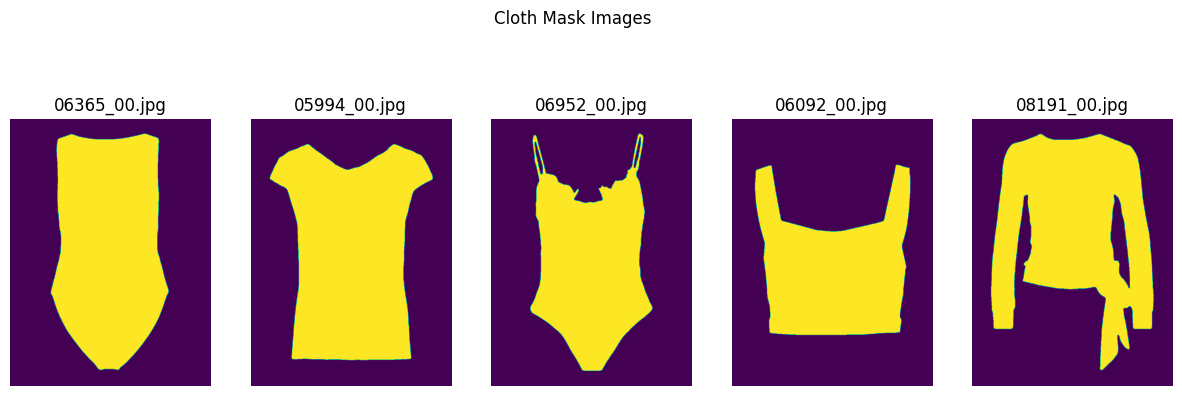

In [10]:
import os
import random
import matplotlib.pyplot as plt

# Sample images from each folder
def show_sample_images(directory, sample_size=5, title="Sample Images"):
    sample_files = random.sample(os.listdir(directory), sample_size)
    plt.figure(figsize=(15, 5))
    for i, file_name in enumerate(sample_files):
        img_path = os.path.join(directory, file_name)
        img = Image.open(img_path)
        plt.subplot(1, sample_size, i + 1)
        plt.imshow(img)
        plt.title(file_name)
        plt.axis('off')
    plt.suptitle(title)
    plt.show()

# Display sample images from each folder
print("Displaying sample images from 'image' folder:")
show_sample_images(os.path.join(train_dir, 'image'), title="Person Images")

print("Displaying sample images from 'cloth' folder:")
show_sample_images(os.path.join(train_dir, 'cloth'), title="Cloth Images")

print("Displaying sample images from 'cloth-mask' folder:")
show_sample_images(os.path.join(train_dir, 'cloth-mask'), title="Cloth Mask Images")


Displaying linked images (person, cloth, and cloth mask):


C:\Users\kandu\AppData\Local\Temp\ipykernel_1860\1096856908.py:12: DeprecationWarning: Sampling from a set deprecated
since Python 3.9 and will be removed in a subsequent version.
  sample_files = random.sample(common_files, sample_size)


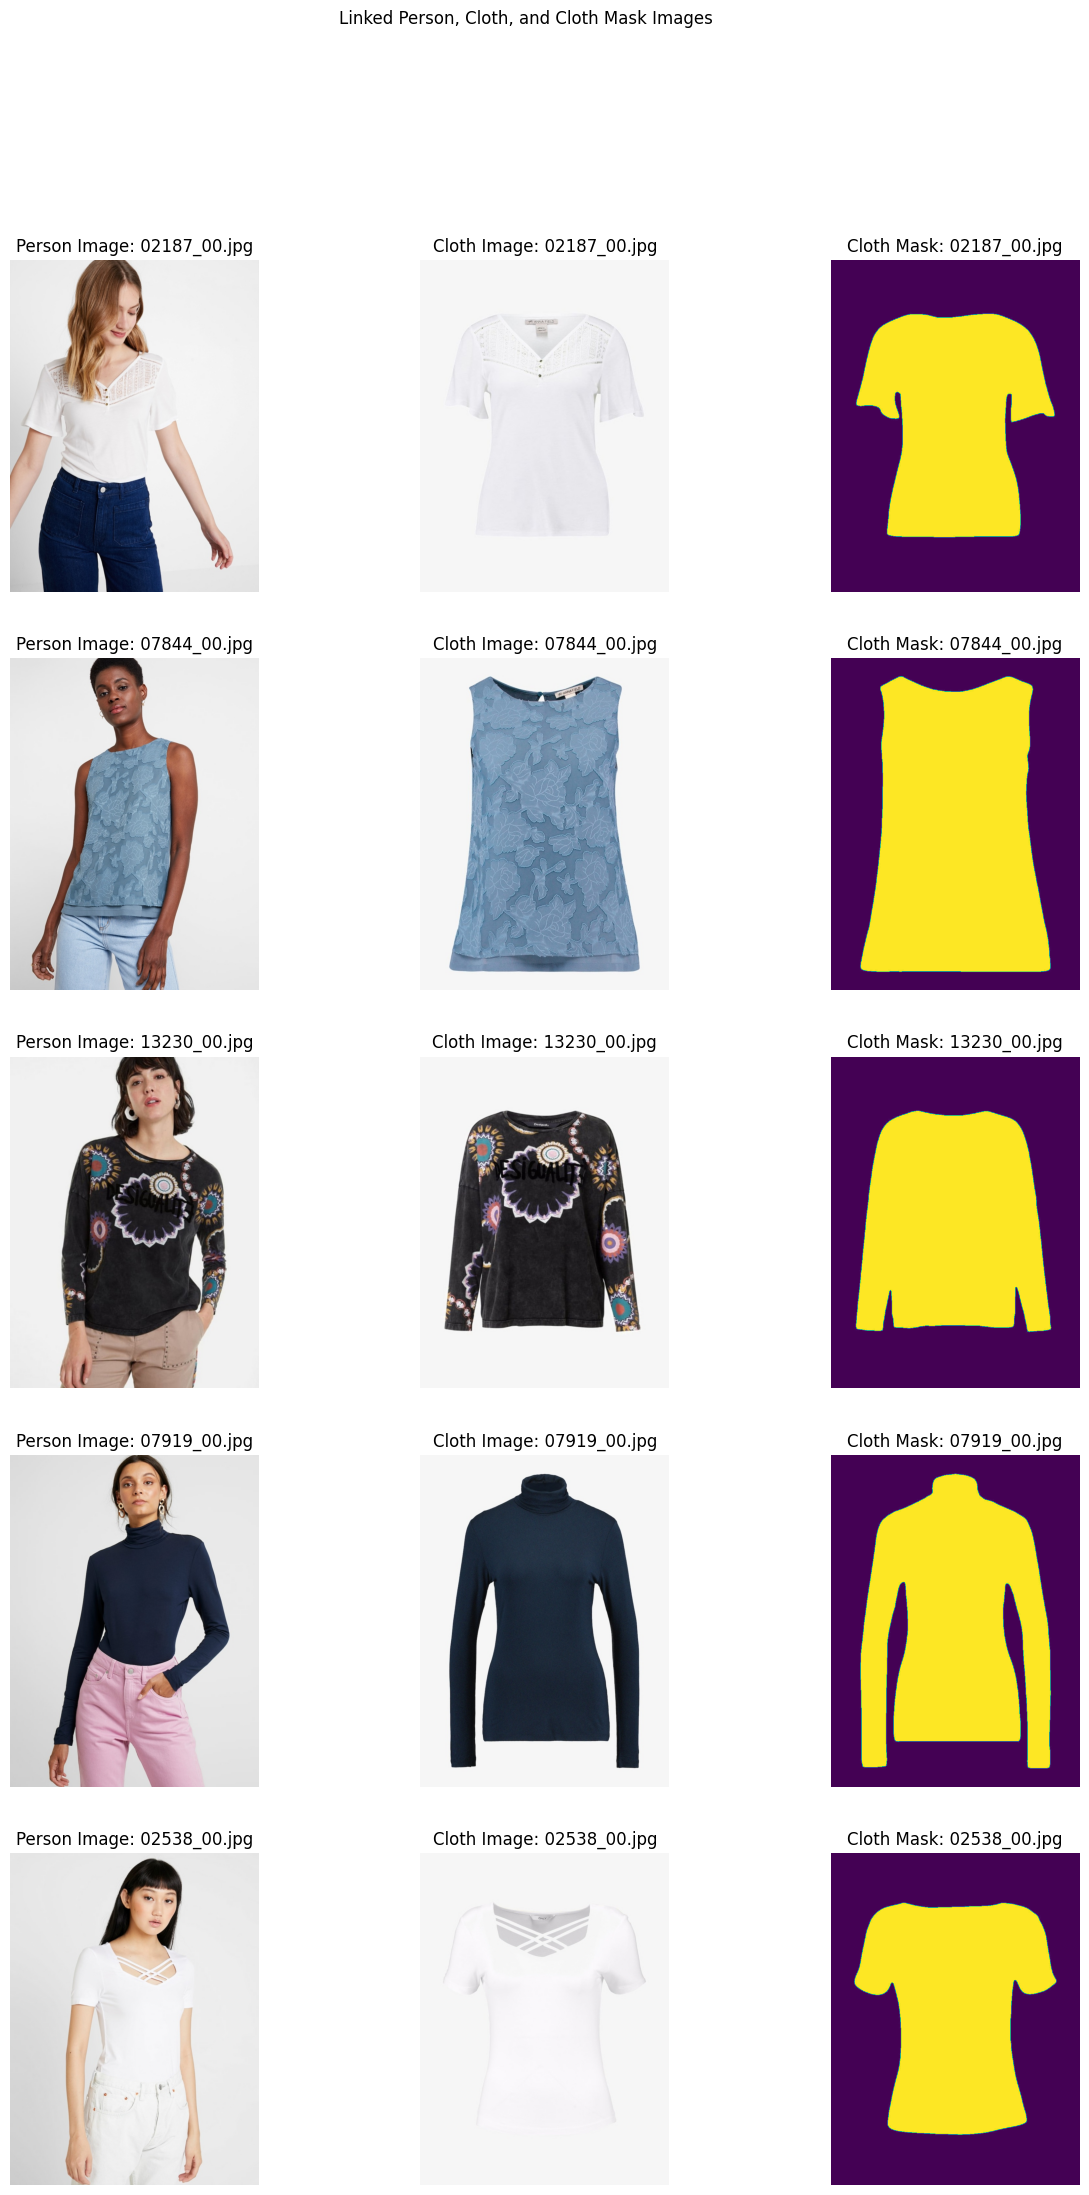

In [12]:
def show_linked_images(person_dir, cloth_dir, mask_dir, sample_size=5):
    person_files = set(f for f in os.listdir(person_dir) if f.endswith('.jpg'))
    cloth_files = set(f for f in os.listdir(cloth_dir) if f.endswith('.jpg'))
    mask_files = set(f for f in os.listdir(mask_dir) if f.endswith('.jpg'))
    
    common_files = person_files.intersection(cloth_files).intersection(mask_files)
    
    sample_files = random.sample(common_files, sample_size)
    
    plt.figure(figsize=(15, 5 * sample_size))
    for i, file_name in enumerate(sample_files):
        person_img_path = os.path.join(person_dir, file_name)
        cloth_img_path = os.path.join(cloth_dir, file_name)
        mask_img_path = os.path.join(mask_dir, file_name)
        
        person_img = Image.open(person_img_path)
        cloth_img = Image.open(cloth_img_path)
        mask_img = Image.open(mask_img_path)

        plt.subplot(sample_size, 3, 3 * i + 1)
        plt.imshow(person_img)
        plt.title(f"Person Image: {file_name}")
        plt.axis('off')
        
        plt.subplot(sample_size, 3, 3 * i + 2)
        plt.imshow(cloth_img)
        plt.title(f"Cloth Image: {file_name}")
        plt.axis('off')
        
        plt.subplot(sample_size, 3, 3 * i + 3)
        plt.imshow(mask_img)
        plt.title(f"Cloth Mask: {file_name}")
        plt.axis('off')
    
    plt.suptitle("Linked Person, Cloth, and Cloth Mask Images")
    plt.show()

print("Displaying linked images (person, cloth, and cloth mask):")
show_linked_images(
    person_dir=os.path.join(train_dir, 'image'),
    cloth_dir=os.path.join(train_dir, 'cloth'),
    mask_dir=os.path.join(train_dir, 'cloth-mask')
)


In [15]:
import json
import os
import random

# Directory containing JSON files
openpose_json_dir = os.path.join(train_dir, 'openpose_json')

# Select a random JSON file
sample_json_file = random.choice([f for f in os.listdir(openpose_json_dir) if f.endswith('.json')])
json_path = os.path.join(openpose_json_dir, sample_json_file)

# Load and print the content of the JSON file
with open(json_path) as f:
    json_content = json.load(f)

# Display the filename and content
print(f"Sample JSON file: {sample_json_file}")
print(json.dumps(json_content, indent=4))


Sample JSON file: 13552_00_keypoints.json
{
    "version": 1.3,
    "people": [
        {
            "person_id": [
                -1
            ],
            "pose_keypoints_2d": [
                414.231,
                193.297,
                0.892213,
                374.707,
                315.011,
                0.789956,
                266.853,
                306.545,
                0.69015,
                218.7,
                507.825,
                0.703615,
                235.733,
                714.745,
                0.812163,
                482.236,
                326.42,
                0.802724,
                504.84,
                513.419,
                0.629524,
                541.771,
                748.588,
                0.585895,
                414.15,
                666.454,
                0.43363,
                348.933,
                666.447,
                0.43473,
                357.526,
                1012.16,
            

Displaying keypoints for 05204_00.jpg


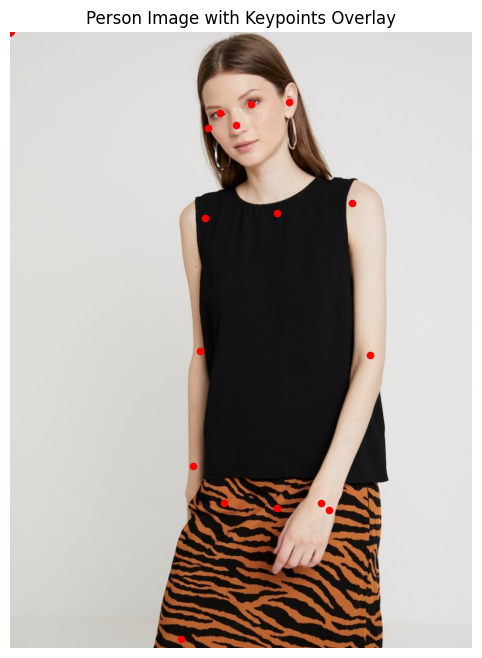

In [14]:

# Define directories
person_dir = os.path.join(train_dir, 'image')
openpose_json_dir = os.path.join(train_dir, 'openpose_json')

# Function to load keypoints from JSON file
def load_keypoints(json_path):
    with open(json_path) as f:
        data = json.load(f)
    # OpenPose JSON structure may vary; adjust based on actual structure
    keypoints = data['people'][0]['pose_keypoints_2d']
    # Reshape the keypoints into (x, y) pairs, ignoring confidence scores
    keypoints = [(keypoints[i], keypoints[i + 1]) for i in range(0, len(keypoints), 3)]
    return keypoints

# Function to display person image with keypoints overlay
def show_person_with_keypoints(person_img_path, json_path):
    # Load image
    person_img = Image.open(person_img_path)
    
    # Load keypoints
    keypoints = load_keypoints(json_path)
    
    # Plot image and keypoints
    plt.figure(figsize=(8, 8))
    plt.imshow(person_img)
    plt.axis('off')
    
    # Plot each keypoint
    x_coords, y_coords = zip(*keypoints)
    plt.scatter(x_coords, y_coords, color='red', s=20, marker='o')
    
    plt.title("Person Image with Keypoints Overlay")
    plt.show()

# Choose a sample image and corresponding JSON file
sample_file = random.choice(os.listdir(person_dir))
person_img_path = os.path.join(person_dir, sample_file)
json_file_path = os.path.join(openpose_json_dir, sample_file.replace('.jpg', '_keypoints.json'))

# Display the person image with keypoints overlay
print(f"Displaying keypoints for {sample_file}")
show_person_with_keypoints(person_img_path, json_file_path)


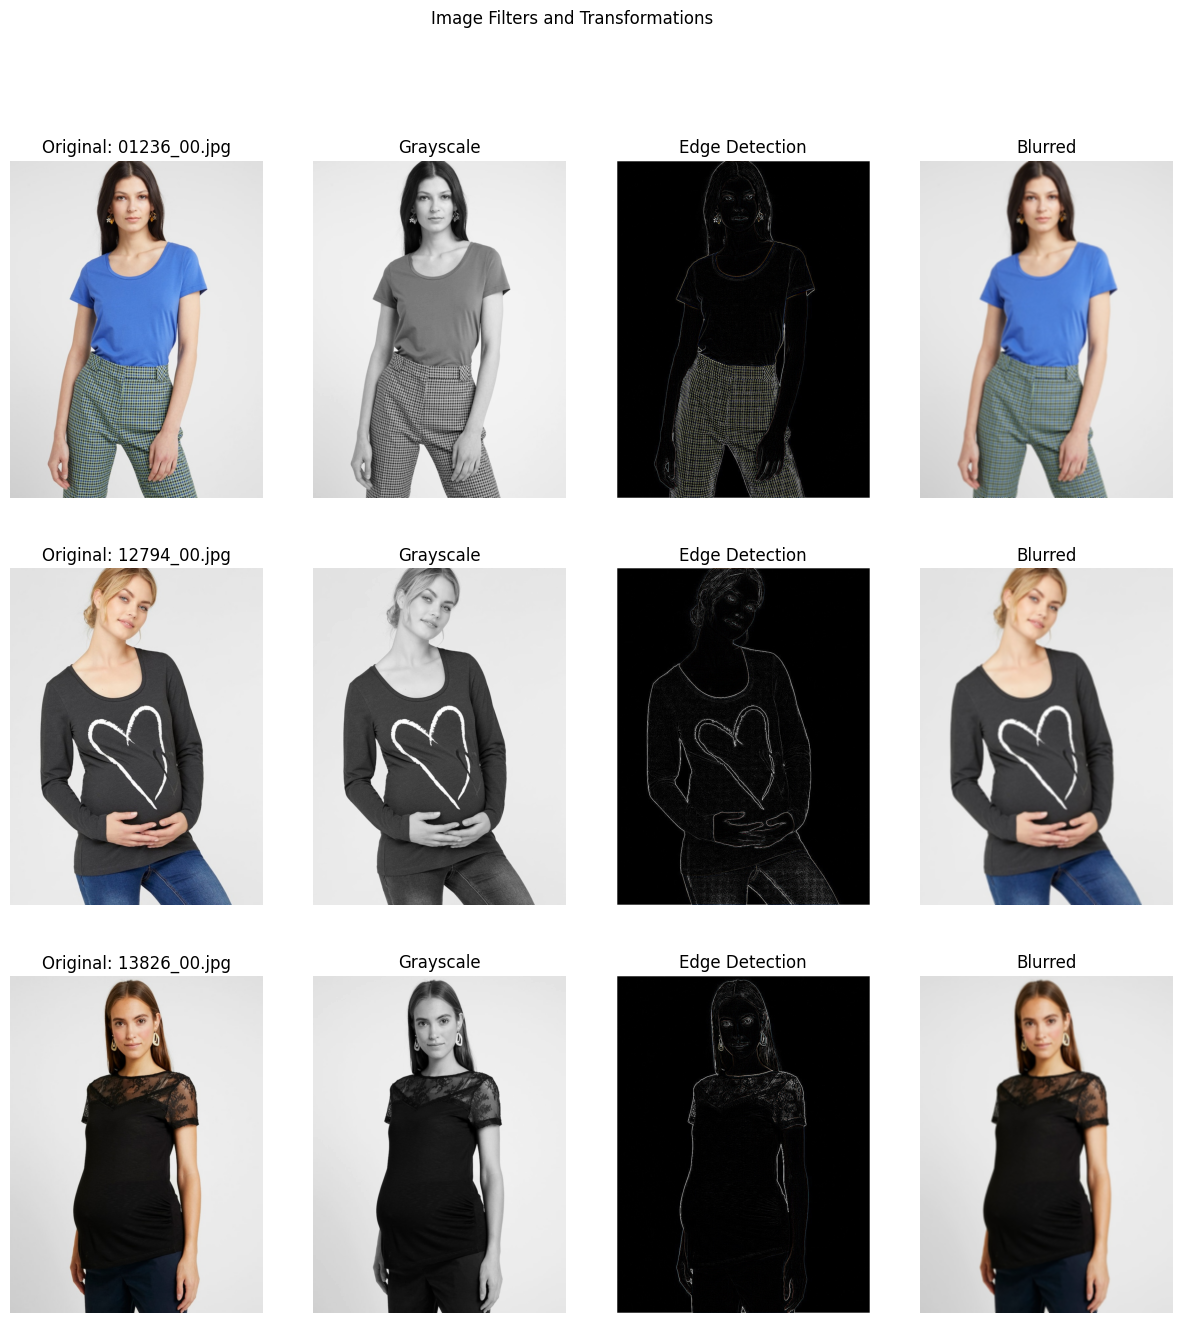

In [16]:


person_dir = os.path.join(train_dir, 'image')

# Function to display images with different filters
def show_filtered_images(directory, sample_size=3):
    # Select random images
    sample_files = random.sample(os.listdir(directory), sample_size)
    
    # Plot each image with filters
    plt.figure(figsize=(15, 5 * sample_size))
    for i, file_name in enumerate(sample_files):
        img_path = os.path.join(directory, file_name)
        img = Image.open(img_path)
        
        # Apply grayscale filter
        grayscale_img = ImageOps.grayscale(img)
        
        # Apply edge detection filter
        edge_img = img.filter(ImageFilter.FIND_EDGES)
        
        # Apply blur filter
        blurred_img = img.filter(ImageFilter.BLUR)
        
        # Display original image
        plt.subplot(sample_size, 4, 4 * i + 1)
        plt.imshow(img)
        plt.title(f"Original: {file_name}")
        plt.axis('off')
        
        # Display grayscale image
        plt.subplot(sample_size, 4, 4 * i + 2)
        plt.imshow(grayscale_img, cmap='gray')
        plt.title("Grayscale")
        plt.axis('off')
        
        # Display edge detection image
        plt.subplot(sample_size, 4, 4 * i + 3)
        plt.imshow(edge_img)
        plt.title("Edge Detection")
        plt.axis('off')
        
        # Display blurred image
        plt.subplot(sample_size, 4, 4 * i + 4)
        plt.imshow(blurred_img)
        plt.title("Blurred")
        plt.axis('off')
    
    plt.suptitle("Image Filters and Transformations")
    plt.show()

# Display filtered images
show_filtered_images(person_dir)


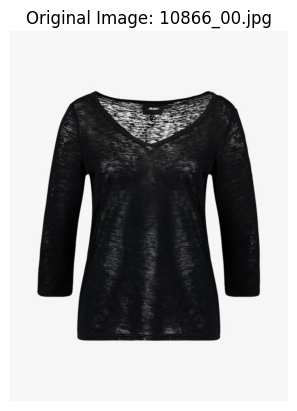

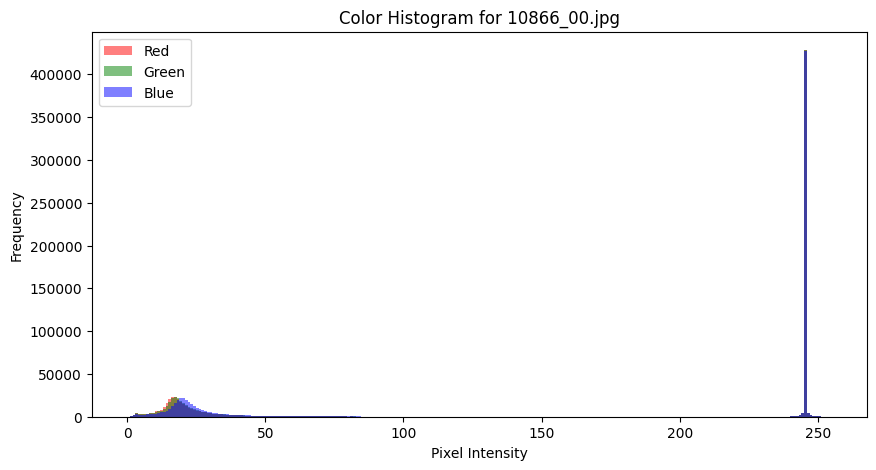

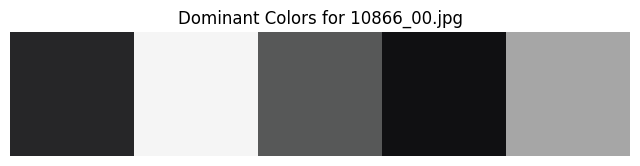

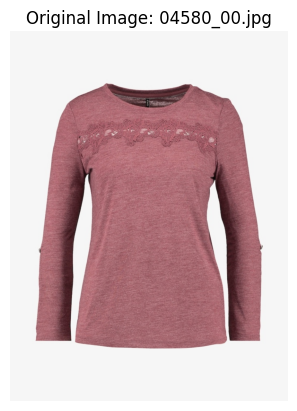

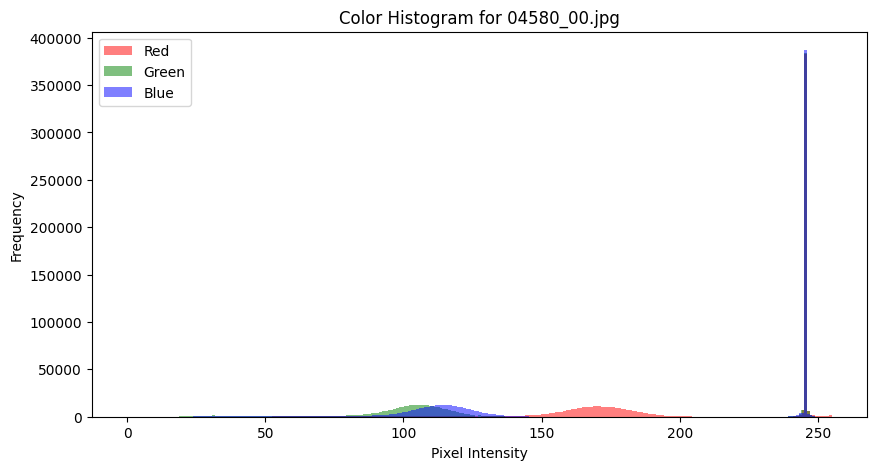

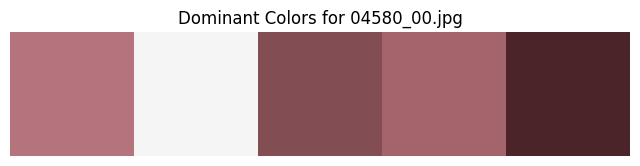

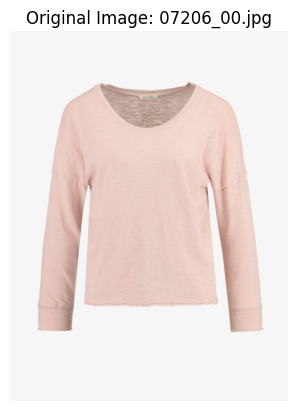

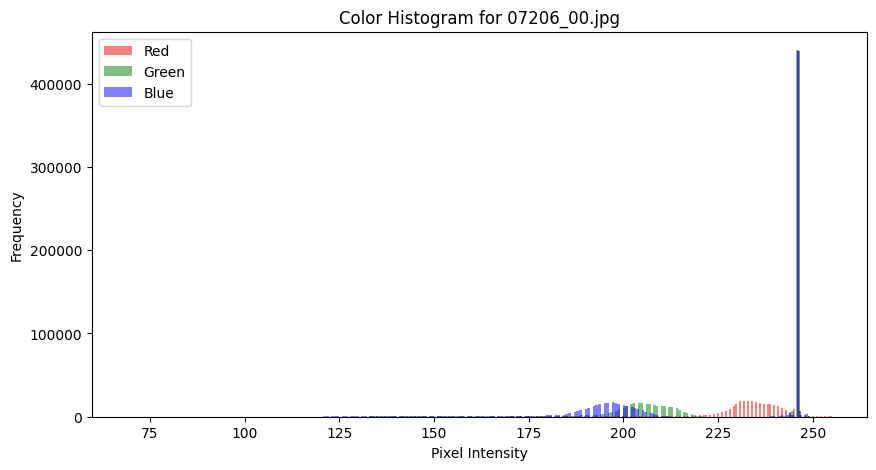

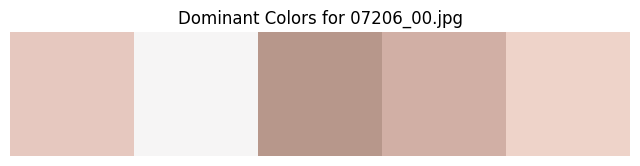

In [23]:
import os
from sklearn.cluster import KMeans

# Directory for cloth images
cloth_dir = os.path.join(train_dir, 'cloth')

# Function to calculate RGB color histograms
def plot_color_histogram(image, title="Color Histogram"):
    # Convert image to RGB and flatten it
    image_np = np.array(image)
    r, g, b = image_np[:, :, 0].flatten(), image_np[:, :, 1].flatten(), image_np[:, :, 2].flatten()

    # Plot histograms for R, G, B channels
    plt.figure(figsize=(10, 5))
    plt.hist(r, bins=256, color='red', alpha=0.5, label='Red')
    plt.hist(g, bins=256, color='green', alpha=0.5, label='Green')
    plt.hist(b, bins=256, color='blue', alpha=0.5, label='Blue')
    plt.legend()
    plt.title(title)
    plt.xlabel("Pixel Intensity")
    plt.ylabel("Frequency")
    plt.show()

# Function to get the dominant colors in an image
def get_dominant_colors(image, num_colors=5):
    image_np = np.array(image)
    # Reshape image to a 2D array of pixels
    pixels = image_np.reshape(-1, 3)
    
    # Apply KMeans to find clusters of colors
    kmeans = KMeans(n_clusters=num_colors, random_state=42)
    kmeans.fit(pixels)
    colors = kmeans.cluster_centers_.astype(int)
    return colors

# Plot color histogram and dominant colors for a sample of cloth images
sample_files = random.sample(os.listdir(cloth_dir), 3)

for file_name in sample_files:
    img_path = os.path.join(cloth_dir, file_name)
    with Image.open(img_path) as img:
        img = img.convert("RGB")
        
        # Display original image
        plt.figure()
        plt.imshow(img)
        plt.title(f"Original Image: {file_name}")
        plt.axis('off')
        plt.show()
        
        # Plot color histogram
        plot_color_histogram(img, title=f"Color Histogram for {file_name}")

        # Get and display dominant colors
        dominant_colors = get_dominant_colors(img)
        plt.figure(figsize=(8, 2))
        plt.imshow([dominant_colors / 255])  # Rescale to [0, 1] range for display
        plt.title(f"Dominant Colors for {file_name}")
        plt.axis('off')
        plt.show()
